## __Import Libraries:__

In [1]:
# For load and visualisation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2

# For preprocessing and model building
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from keras.models import model_from_json
from keras.models import load_model


## __Loading & Visualising the data:__

In [2]:
path = 'D:\\IIM Course\\Capstone Project\\Project/'
os.listdir(path)

['.ipynb_checkpoints',
 'fashion',
 'fashion.zip',
 'IIM-Capstone-Project',
 'ImgClassification-CustomCNN-Copy1.ipynb',
 'ImgClassification-CustomCNN.ipynb',
 'ImgClassification-VGG16.ipynb',
 'ImgClassificationNOT.ipynb',
 'model.h5',
 'predictImages',
 'train.csv',
 'untitled0.py',
 'VGG16 Arch..png']

In [3]:
# Reading .csv file
train_df = pd.read_csv(path + 'train.csv')
train_df.head()

,files,target,images
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg


In [4]:
# Get hot-encoded labels for targets
df2 = pd.get_dummies(train_df, columns=['target'])
display(df2)

,files,images,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,5da81ceb7861c2af6a5a89a7_1.jpg,0,0,0,1
1,../input/fashiondata/data/beauty/5da81d8a7861c...,5da81d8a7861c2af6a5a901c_3.jpg,0,1,0,0
2,../input/fashiondata/data/beauty/5da820f26504f...,5da820f26504fb65da0043e6_0.jpg,0,1,0,0
3,../input/fashiondata/data/jewelry and watches/...,5da81c026504fb65cea700d2_0.jpg,0,0,1,0
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,5da81d2c7861c2af6a5a8c64_2.jpg,1,0,0,0
...,...,...,...,...,...,...
5995,../input/fashiondata/data/jewelry and watches/...,5db865b0d5424ee1f33537b6_2.jpg,0,0,1,0
5996,../input/fashiondata/data/bags/5db81154d5424ee...,5db81154d5424ee1f3352f9c_2.jpg,1,0,0,0
5997,../input/fashiondata/data/bags/5da81d547861c2a...,5da81d547861c2af6a5a8e7d_2.jpg,1,0,0,0
5998,../input/fashiondata/data/beauty/5da81b44b25b0...,5da81b44b25b035d1d17a692_6.jpg,0,1,0,0


In [5]:
# Separating the hot-encoded columns
df1 = df2.drop(['files', 'images'],axis=1)
display(df1)

,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
5995,0,0,1,0
5996,1,0,0,0
5997,1,0,0,0
5998,0,1,0,0


In [6]:
# Merge with the original dataset
df = train_df.merge(df1, left_index = True, right_index = True)
display(df)

,files,target,images,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg,0,0,0,1
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg,0,1,0,0
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg,0,1,0,0
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg,0,0,1,0
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg,1,0,0,0
...,...,...,...,...,...,...,...
5995,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5db865b0d5424ee1f33537b6_2.jpg,0,0,1,0
5996,../input/fashiondata/data/bags/5db81154d5424ee...,bags,5db81154d5424ee1f3352f9c_2.jpg,1,0,0,0
5997,../input/fashiondata/data/bags/5da81d547861c2a...,bags,5da81d547861c2af6a5a8e7d_2.jpg,1,0,0,0
5998,../input/fashiondata/data/beauty/5da81b44b25b0...,beauty,5da81b44b25b035d1d17a692_6.jpg,0,1,0,0


In [7]:
# Drop non-essential column
df = df.drop(['files'],axis=1)
display(df)

,target,images,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,shoes,5da81ceb7861c2af6a5a89a7_1.jpg,0,0,0,1
1,beauty,5da81d8a7861c2af6a5a901c_3.jpg,0,1,0,0
2,beauty,5da820f26504fb65da0043e6_0.jpg,0,1,0,0
3,jewelry and watches,5da81c026504fb65cea700d2_0.jpg,0,0,1,0
4,bags,5da81d2c7861c2af6a5a8c64_2.jpg,1,0,0,0
...,...,...,...,...,...,...
5995,jewelry and watches,5db865b0d5424ee1f33537b6_2.jpg,0,0,1,0
5996,bags,5db81154d5424ee1f3352f9c_2.jpg,1,0,0,0
5997,bags,5da81d547861c2af6a5a8e7d_2.jpg,1,0,0,0
5998,beauty,5da81b44b25b035d1d17a692_6.jpg,0,1,0,0


In [8]:
# Check for null items
df.isnull().sum().sum()

0

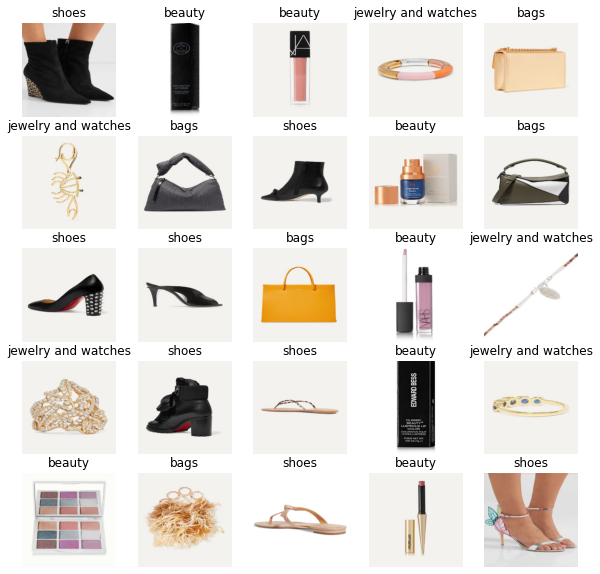

In [9]:
# Plot images wrt the given targets
plt.figure(figsize=(10, 10))

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img = mpimg.imread(path + '/fashion/' + df["images"][i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(df["target"][i])
    plt.axis("off")
    
    X = np.array(df)

In [10]:
# Check names of the columns
train_df.columns

Index(['files', 'target', 'images'], dtype='object')

In [11]:
# Check names of the new dataframe columns
df.columns

Index(['target', 'images', 'target_bags', 'target_beauty',
       'target_jewelry and watches', 'target_shoes'],
      dtype='object')

In [12]:
# Check unique columns
df['target'].unique()

array(['shoes', 'beauty', 'jewelry and watches', 'bags'], dtype=object)

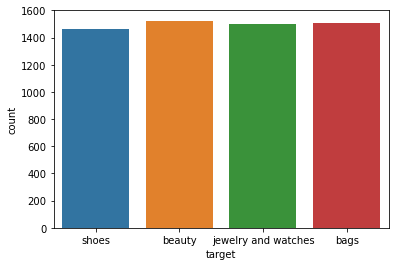

In [13]:
# Countplot to check if data has equal shape
sns.countplot(df['target'])

In [14]:
# Count to check if data has equal sape
df["target"].value_counts()

beauty                 1524
bags                   1508
jewelry and watches    1503
shoes                  1465
Name: target, dtype: int64

## __Preprocessing of the data:__

In [16]:
# Preprocessing the data
train_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img(path + '/fashion/' +df['images'][i],target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:30<00:00, 198.86it/s]


In [17]:
# Shape of the array
X.shape

(6000, 256, 256, 3)

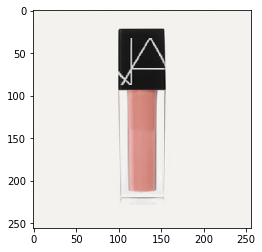

In [18]:
# Plot and visualize preprocessed image
plt.imshow(X[2])

In [19]:
# Plot and visualize preprocessed image
df['target'][2]

'beauty'

In [20]:
y = np.array(df.drop(['target', 'images'],axis=1))
y.shape

(6000, 4)

## __Defining the architecture of the model:__

In [22]:
# Randomly separate 10% of the images as our validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [23]:
# Define the architecture of our model
# 
model = Sequential()
# Layer1
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer2
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer3
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer4
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Defining output layer with Neurons
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

In [24]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        5

In [25]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Training the model.
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
85/85 [==============================] - 610s 7s/step - loss: 0.6084 - accuracy: 0.2343 - val_loss: 0.5892 - val_accuracy: 0.2650
Epoch 2/20
85/85 [==============================] - 583s 7s/step - loss: 0.5600 - accuracy: 0.3355 - val_loss: 0.4893 - val_accuracy: 0.5733
Epoch 3/20
85/85 [==============================] - 578s 7s/step - loss: 0.4719 - accuracy: 0.5435 - val_loss: 0.4278 - val_accuracy: 0.6517
Epoch 4/20
85/85 [==============================] - 568s 7s/step - loss: 0.4086 - accuracy: 0.6239 - val_loss: 0.3242 - val_accuracy: 0.7350
Epoch 5/20
85/85 [==============================] - 568s 7s/step - loss: 0.3460 - accuracy: 0.7057 - val_loss: 0.2779 - val_accuracy: 0.7967
Epoch 6/20
85/85 [==============================] - 566s 7s/step - loss: 0.2969 - accuracy: 0.7533 - val_loss: 0.2665 - val_accuracy: 0.8050
Epoch 7/20
85/85 [==============================] - 574s 7s/step - loss: 0.2648 - accuracy: 0.7958 - val_loss: 0.2441 - val_accuracy: 0.8350
Epoch 8/20
85

In [57]:
# Took ~3 hours for training
# serialize model to JSON
model_json = model.to_json()
with open("model_resized.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5
model.save("model_resized.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load model
#model = load_model('model.h5')
#print("Loaded model from disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

#f = open ('model.json', "r")
#data = json.loads(f.read())
#data

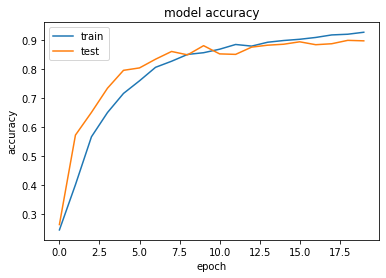

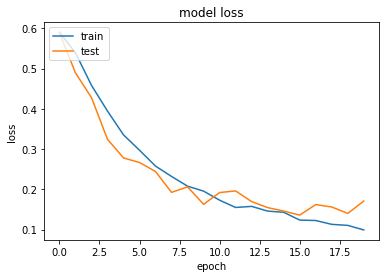

In [51]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [52]:
# evaluate the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the train set
scores = model.evaluate(X_train, y_train, verbose=0)
print("Final train %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Final test accuracy: 89.83%
Final train accuracy: 96.74%


## __Testing the made arcitecture:__

In [43]:
img = image.load_img(path + '/predictImages/' +'jewel.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255

target_jewelry and watches (0.999)
target_bags (0.000118)
target_beauty (1.57e-05)
target_shoes (6.93e-06)


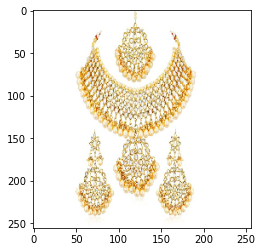

In [44]:
classes = np.array(df.columns[2:])
proba = model.predict(img.reshape(1,256,256,3))
among4 = np.argsort(proba[0])[:-5:-1]
for i in range(4):
    print("{}".format(classes[among4[i]])+" ({:.3})".format(proba[0][among4[i]]))
plt.imshow(img)